In [ ]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

In [ ]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

In [ ]:
%autoreload

cohort = mre_pinn.data.PatientCohort(patient_ids='0006', xarray_dir='../data/NAFLD_test')
#cohort = mre_pinn.data.PatientCohort.from_file('../data/NAFLD/NAFLD_2022-11-7.xarrays', xarray_dir='../data/NAFLD')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()
cohort.eval_baseline()

In [4]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', detach=True)
pde

In [10]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=4,
    n_channels_block=16,
    n_conv_per_block=1,
    n_conv_blocks=8,
    width_factor=2,
    activ_fn='g',
    n_latent=1024,
    n_spatial_freqs=128,
    u_omega=15/300,
    u_scale=1e2,
    mu_omega=20/300,
    mu_scale=5e2,
    skip_connect=True,
    dense=True
)
pino

HyperCNN(
  (cnn): CNN(
    (conv_in): Conv3d(4, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=2, stride=2, padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=2, stride=2, padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=2, stride=2, padding=0)
    (conv_block3): ConvBlock(
      (conv0): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool3): AvgPool3d(kernel_size=2, stride=2, padding=0)
    (conv_block4): ConvBlock(
      (conv0): Conv3d(256, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool4): AvgPool3d(kernel_size=(

In [11]:
%autoreload

model = mre_pinn.training.PINOModel(cohort, pino, pde, patch_size=None, batch_size=1)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss_weights=[1e0, 1e0],
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=20, interact=True)

Compiling model...
'compile' took 0.000333 s



Training model...

0         [3.81e+04, 1.36e+06]    [3.81e+04, 1.36e+06]    []  


<IPython.core.display.Javascript object>


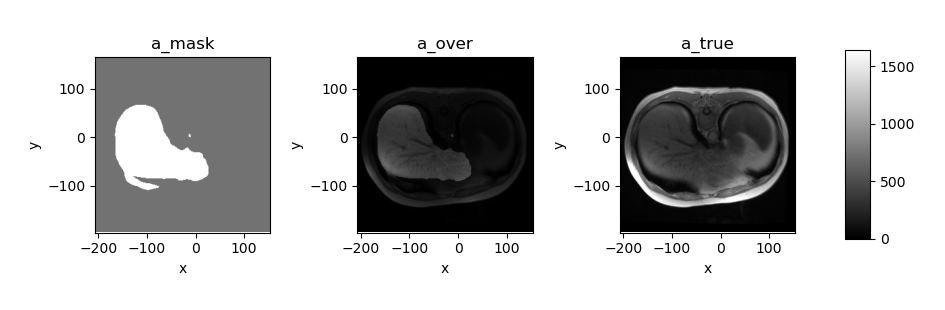

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


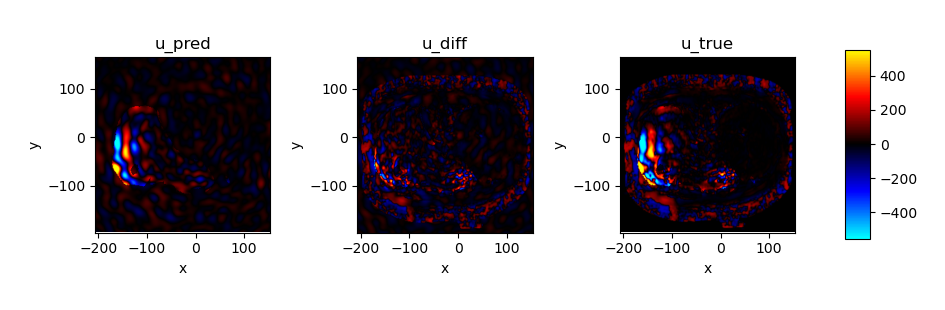

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


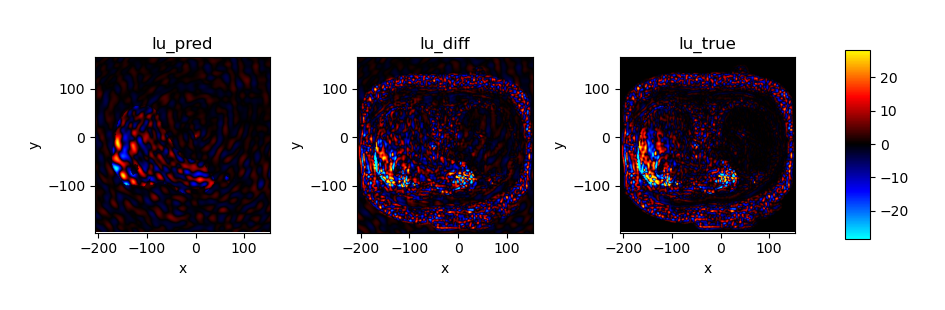

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


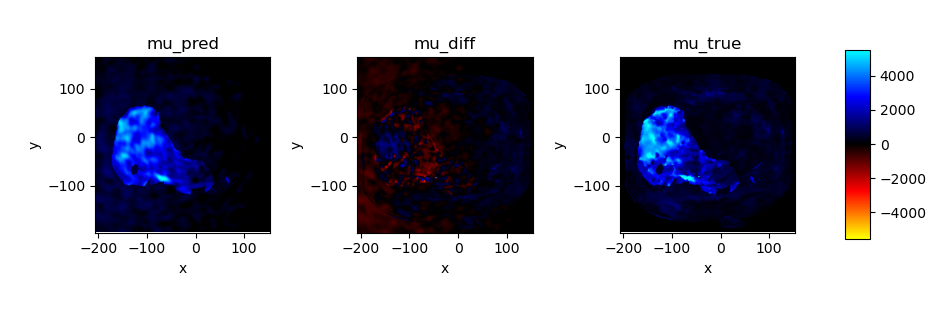

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

10        [2.45e+04, 6.71e+05]    [2.45e+04, 6.71e+05]    []  
Time spent testing: 30.06%
20        [1.70e+04, 5.09e+05]    [1.70e+04, 5.09e+05]    []  
30        [1.38e+04, 4.21e+05]    [1.38e+04, 4.21e+05]    []  
Time spent testing: 26.07%
40        [1.07e+04, 3.46e+05]    [1.07e+04, 3.46e+05]    []  
50        [8.43e+03, 2.93e+05]    [8.43e+03, 2.93e+05]    []  
Time spent testing: 24.73%
60        [7.24e+03, 2.97e+05]    [7.24e+03, 2.97e+05]    []  
70        [6.47e+03, 2.67e+05]    [6.47e+03, 2.67e+05]    []  
Time spent testing: 24.12%
80        [5.86e+03, 2.74e+05]    [5.86e+03, 2.74e+05]    []  
90        [5.67e+03, 2.53e+05]    [5.67e+03, 2.53e+05]    []  
Time spent testing: 23.72%
100       [5.32e+03, 2.41e+05]    [5.32e+03, 2.41e+05]    []  
110       [4.96e+03, 2.42e+05]    [4.96e+03, 2.42e+05]    []  
Time spent testing: 23.49%
120       [4.91e+03, 2.68e+05]    [4.91e+03, 2.68e+05]    []  
130       [4.75e+03, 2.46e+05]    [4.75e+03, 2.46e+05]    []  
Time spent testing:

1080      [3.29e+03, 1.78e+05]    [3.29e+03, 1.78e+05]    []  
1090      [3.28e+03, 1.81e+05]    [3.28e+03, 1.81e+05]    []  
Time spent testing: 22.94%
1100      [3.27e+03, 1.75e+05]    [3.27e+03, 1.75e+05]    []  
1110      [3.27e+03, 1.78e+05]    [3.27e+03, 1.78e+05]    []  
Time spent testing: 22.95%
1120      [3.26e+03, 1.74e+05]    [3.26e+03, 1.74e+05]    []  
1130      [3.26e+03, 1.79e+05]    [3.26e+03, 1.79e+05]    []  
Time spent testing: 22.94%
1140      [3.26e+03, 1.81e+05]    [3.26e+03, 1.81e+05]    []  
1150      [3.25e+03, 1.74e+05]    [3.25e+03, 1.74e+05]    []  
Time spent testing: 22.94%
1160      [3.25e+03, 1.78e+05]    [3.25e+03, 1.78e+05]    []  
1170      [3.24e+03, 1.75e+05]    [3.24e+03, 1.75e+05]    []  
Time spent testing: 22.93%
1180      [3.24e+03, 1.74e+05]    [3.24e+03, 1.74e+05]    []  
1190      [3.25e+03, 1.83e+05]    [3.25e+03, 1.83e+05]    []  
Time spent testing: 22.94%
1200      [3.24e+03, 1.77e+05]    [3.24e+03, 1.77e+05]    []  
1210      [3.24e+03

KeyboardInterrupt: 

In [12]:
torch.backends.cudnn.enabled = False
model.train(10000, display_every=10, callbacks=[test_eval])